# Problem 3 (10pts)

### 3. Implement minimization for the negative dual Lagrange function

In [71]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

In [72]:
# prepare Dataset

d = 200   # x in R^d
n = 180   # 1 <= i <= n
x = np.random.rand (n, d) - 0.5
y = np.sum (x, axis=1) > 0
y = 2 * y - 1
#print (x.shape)
#print (y.shape)

In [73]:
def neg_dual_lagrange (alpha, K, lam):
  j = - 1 / (4 * lam) * np.dot (alpha.T, np.dot (K, alpha)) + np.sum (alpha)
  #j = - j   # maximize -> minimize problem
  return j

In [74]:
def P_01 (vec):
  for i in range (len (vec)):
    if vec[i] < 0:
      vec[i] = 0
    elif vec[i] > 1:
      vec[i] = 1
  return vec

In [75]:
# projected gradient

alpha_history = []
score_history = []
optimal_w_history = []

alpha = np.random.rand (n)
lam = 1
step = 0.01     # learning rate
K = np.zeros ((n, n))

for i in range (n):
  for j in range (n):
    K [i, j] = y[i] * y[j] * np.dot (x[i].T, x[j])

for i in range (1000):
  alpha = P_01 (alpha - step * (1 / (2 * lam) * np.dot (K, alpha) - np.ones (n)))
  score = neg_dual_lagrange (alpha, K, lam)

  sum = np.zeros (d)
  for j in range (n):
    sum += alpha [j] * y [j] * x[j]
  optimal_w = 1 / (2 * lam) * sum

  alpha_history.append (alpha)
  score_history.append (score)
  optimal_w_history.append (optimal_w)

# calculate hinge_loss by cvx
west = cv.Variable (d)
obj_fn = lam * cv.norm (west, 2)
for i in range (n):
  obj_fn += cv.maximum (0, 1 - y[i] * west.T * x[i])
objective = cv.Minimize (obj_fn)
constraints = []
prob = cv.Problem (objective, constraints)
result = prob.solve (solver=cv.CVXOPT)
west = west.value


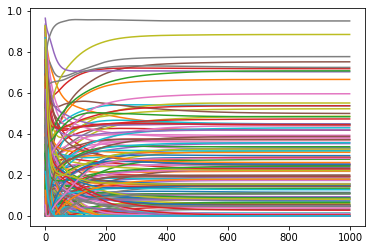

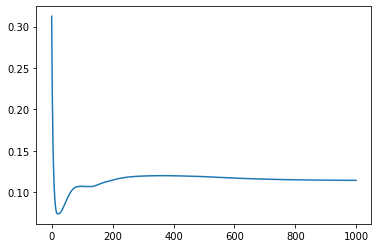

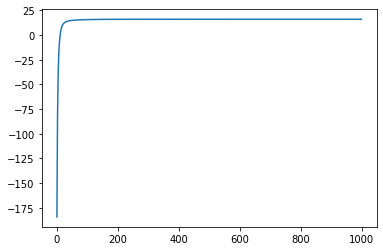

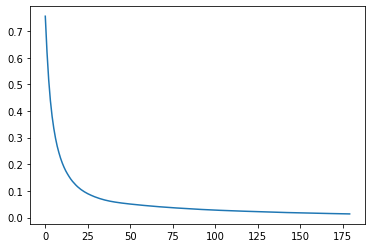

In [76]:
plt.plot (alpha_history)
plt.show ()

alpha0_history = []
for i in range (len (alpha_history)): 
  alpha0_history.append (alpha_history[i][0])

plt.plot (alpha0_history)
plt.show ()

plt.plot (score_history)
plt.show ()

#print (optimal_w - west)
diff_history = []
for i in range (n):
  diff = optimal_w_history [i] - west
  diff_average = np.sum (np.abs (diff)) / d
  diff_history.append (diff_average)

plt.plot (diff_history)
plt.show ()